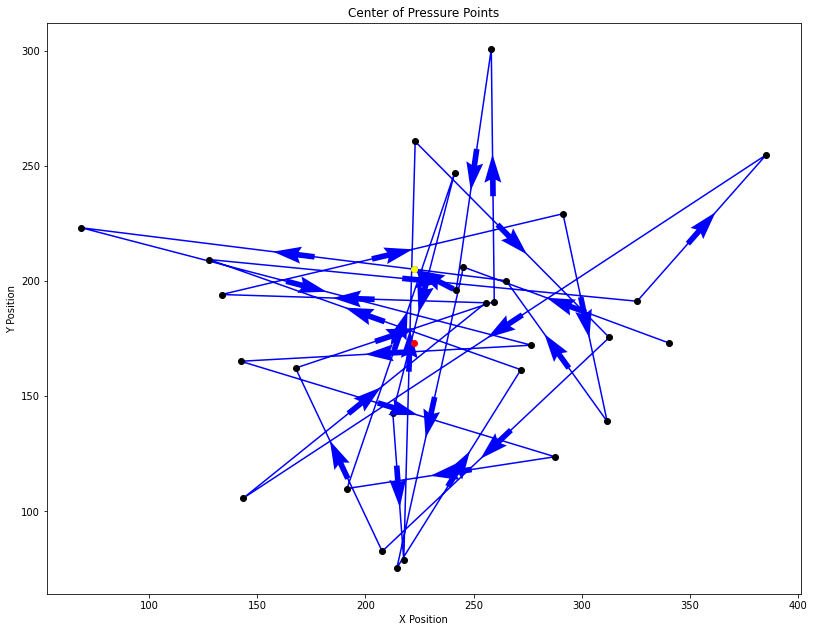

In [110]:

'''
@Brief  Center of Pressure Position Plot
@author Byunghun Hwang<bh.hwang@iae.re.kr>
@Date   2020.12.17
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import json


# Loadcell Data file path
dataset = pd.read_csv('./data_size/sample_cop.csv', header=0, index_col=False)

# Loadcell Position (L1:Origin, L2:Upper Left, L3:Lower Right, L4: Upper Right)
LPos = {"L1":(0,0), "L2":(0,366), "L3":(455,0), "L4":(455,366)}

# Add row sum
dataset["sum"]=dataset.sum(axis=1)

#Calc Center of Pressure Point
Copx = (dataset["L1"]*LPos["L1"][0]+dataset["L2"]*LPos["L2"][0]+dataset["L3"]*LPos["L3"][0]+dataset["L4"]*LPos["L4"][0])/dataset["sum"]
Copy = (dataset["L1"]*LPos["L1"][1]+dataset["L2"]*LPos["L2"][1]+dataset["L3"]*LPos["L3"][1]+dataset["L4"]*LPos["L4"][1])/dataset["sum"]


plt.figure(figsize=(13.5, 10.5))
plt.title('Center of Pressure Points')
plt.plot(Copx, Copy, color='b',zorder=1)
plt.scatter(Copx, Copy, color='black',zorder=2)

u = np.diff(Copx)
v = np.diff(Copy)
norm = np.sqrt(u**2+v**2)
plt.quiver(Copx[:-1]+u/2, Copy[:-1]+v/2, u/norm, v/norm, angles="xy", zorder=3, pivot="middle", color="b")

plt.plot(Copx[-1:], Copy[0:1], marker="o", color='red',zorder=5) #start point
plt.plot(Copx[-1:], Copy[-1:], marker="o", color='yellow',zorder=5) #end point
plt.ylabel('Y Position')
plt.xlabel('X Position')
plt.show()

